# Data Preprocessing

In [14]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
dataset = load_dataset("maharshipandya/spotify-tracks-dataset")

In [16]:
df = dataset['train'].to_pandas()

In [17]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Check NAs

In [18]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

The dataset we are working with is a cleaned Europe dataset that doesn't have any missing data (NA values). However, we should still check for any potential outliers that could affect our model's performance.

First, let's plot a histogram to show the frequency distribution of the prices:

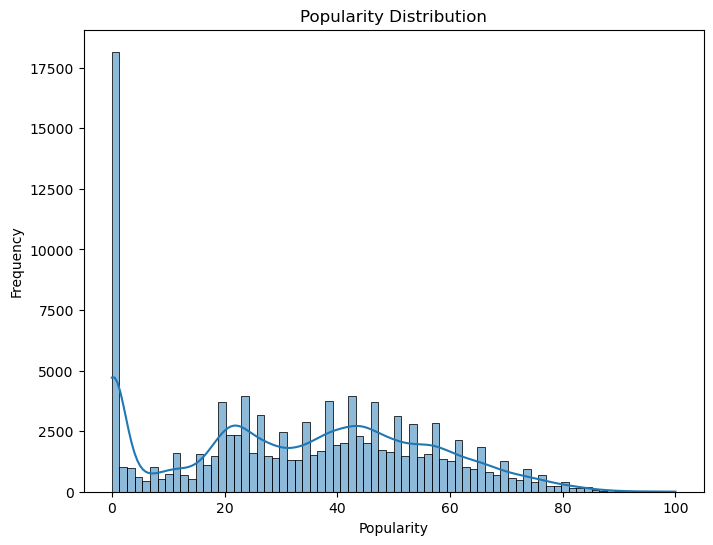

In [22]:
# Histogram for price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], kde=True)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
#plt.savefig('figures/price_distribution_before.png', dpi=300, bbox_inches='tight')
plt.show()

## Remove the outliers

From the histogram, we can observe that there seem to be outliers in the price distribution. To address this issue, we will remove the outliers based on the Interquartile Range (IQR) method. Here's the code to perform this operation:

In [6]:
price_summary = df['Price'].describe()
print(price_summary)
price_summary.to_csv('results/price_summary.csv')

count    41714.000000
mean       260.094423
std        279.408493
min         34.779339
25%        144.016085
50%        203.819274
75%        297.373358
max      18545.450285
Name: Price, dtype: float64


After removing the outliers, we will save the filtered dataset to a filtered CSV file:

In [7]:
# Remove outliers based on Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.8 * IQR
upper_bound = Q3 + 1.8 * IQR

# Filter out the outliers
filtered_data = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
filtered_data.to_csv('data/filtered_data.csv', index=False)
print(filtered_data.shape)
print(lower_bound)
print(upper_bound)

(39365, 19)
-132.02700727067884
573.4164505330268


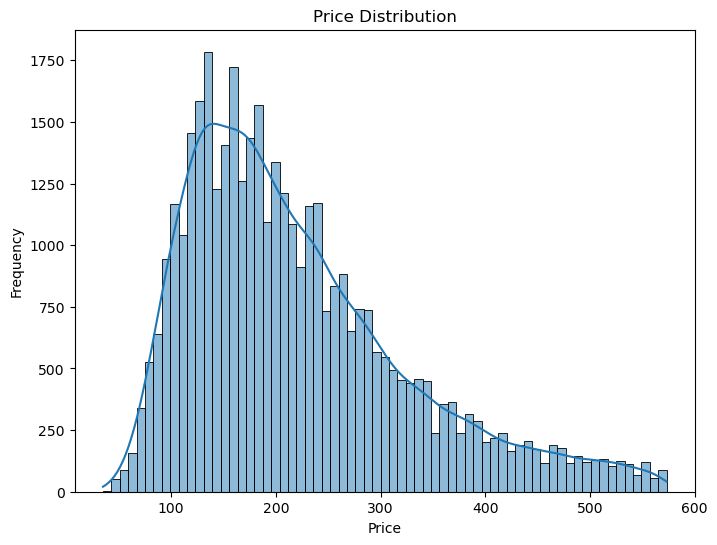

In [8]:
# Histogram for price distribution
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('figures/price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()